In [5]:
import pandas as pd
df_sim_data=pd.read_csv('sim_data.csv')
df_amp_data=pd.read_csv('amp_data.csv')
df_imputed_r_data=pd.read_csv('imputed_r_30_percent_data.csv')
print(df_sim_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
x1    2000 non-null float64
x2    2000 non-null float64
x3    2000 non-null float64
x4    2000 non-null float64
x5    2000 non-null int64
dtypes: float64(4), int64(1)
memory usage: 78.2 KB
None


In [6]:
df_amp_data=pd.read_csv('amp_data.csv')
df_amp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
x1    2000 non-null float64
x2    1400 non-null float64
x3    1400 non-null float64
x4    1400 non-null float64
x5    1400 non-null float64
dtypes: float64(5)
memory usage: 78.2 KB


#### Below we look at the distribution of the target (salary). Note that it is skewed to the right. We should apply a transformation in at attempt to get something more normal

In [7]:
def show_distribution_hist(df,t_column,t_trans):
    import matplotlib.pyplot as plt
    import numpy as np
    df[t_column].apply(t_trans).hist()
    plt.show()

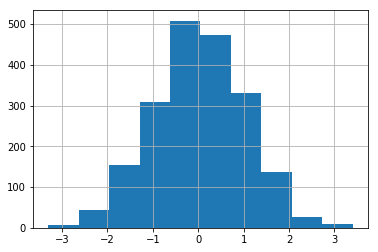

In [8]:
# x1 will be the target variable
import numpy as np
show_distribution_hist(df_sim_data,'x1',lambda x: x)

#### Below we apply a log tranformation. This reduced the skewness of the distribution

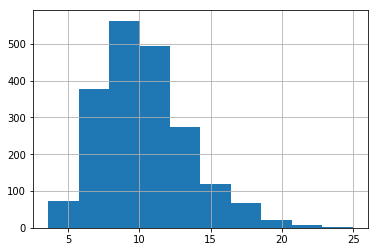

In [9]:
# x2 is a feature. It is simulated data. It is skewed right by design. After the impute 
# process is finished, we want a variety of distrution shapes. This will allows us
# to compare the distributions of the imputed data to the source data.
import numpy as np
show_distribution_hist(df_sim_data,'x2',lambda x: x)

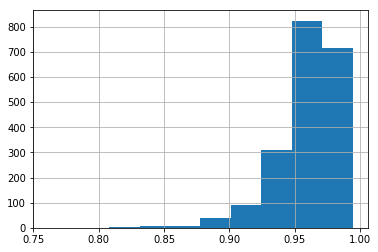

In [10]:
# x3 is a feature. It is simulated data. It is skewed left by design. After the impute 
# process is finished, we want a variety of distrution shapes. This will allows us
# to compare the distributions of the imputed data to the source data.
import numpy as np
show_distribution_hist(df_sim_data,'x3',lambda x: x)

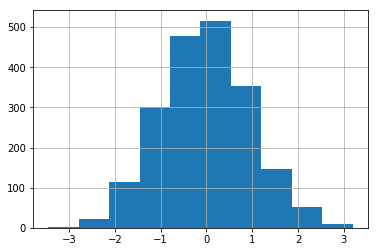

In [11]:
# x4 is a feature. It is simulated data. Note is has no skew. After the impute 
# process is finished, we want a variety of distrution shapes. This will allows us
# to compare the distributions of the imputed data to the source data.
import numpy as np
show_distribution_hist(df_sim_data,'x4',lambda x: x)

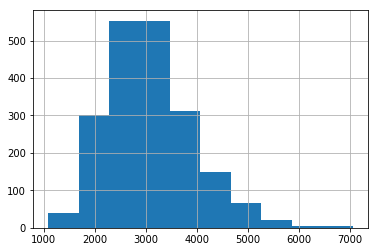

In [12]:
# x5 is a feature. It is simulated data. It is skewed right by design. It is also all integer 
# data. After the impute 
# process is finished, we want a variety of distrution shapes. This will allows us
# to compare the distributions of the imputed data to the source data.
import numpy as np
show_distribution_hist(df_sim_data,'x5',lambda x: x)

In [13]:
import pandas as pd
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np


# 30 percent
dataframe=df_amp_data
print(dataframe.shape)
from fancyimpute import MICE
solver=MICE(impute_type='pmm')
Imputed_dataframe=solver.complete(dataframe.values)
Imputed_dataframe=pd.DataFrame(Imputed_dataframe,columns=dataframe.columns.tolist())
#Imputed_dataframe.to_csv('train_Python_.csv',index=False)

(2000, 5)
[MICE] Completing matrix with shape (2000, 5)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.147
[MICE] Starting imputation round 3/110, elapsed time 0.297
[MICE] Starting imputation round 4/110, elapsed time 0.435
[MICE] Starting imputation round 5/110, elapsed time 0.579
[MICE] Starting imputation round 6/110, elapsed time 0.715
[MICE] Starting imputation round 7/110, elapsed time 0.857
[MICE] Starting imputation round 8/110, elapsed time 0.987
[MICE] Starting imputation round 9/110, elapsed time 1.129
[MICE] Starting imputation round 10/110, elapsed time 1.267
[MICE] Starting imputation round 11/110, elapsed time 1.413
[MICE] Starting imputation round 12/110, elapsed time 1.548
[MICE] Starting imputation round 13/110, elapsed time 1.688
[MICE] Starting imputation round 14/110, elapsed time 1.817
[MICE] Starting imputation round 15/110, elapsed time 1.959
[MICE] Starting imputation round 16/110, elapsed time

## Below we look at a single feature. We look at a result with 30% missing. The results for all the features are very simular. 

45.0126


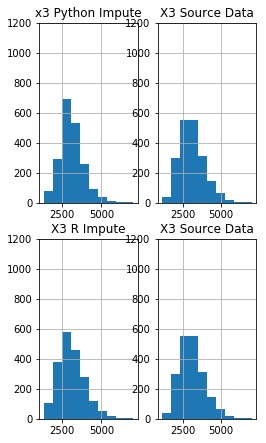

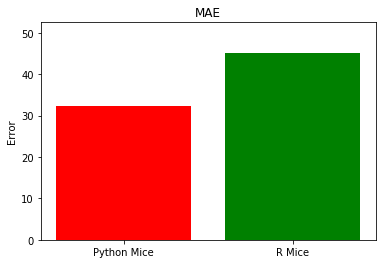

In [38]:
import matplotlib.pyplot as plt
plt.subplot(2,3,1)
plt.ylim((0, 1200))
t_column='x5'
plt.title("x3 Python Impute")
Imputed_dataframe[t_column].hist()
plt.subplot(2,3,2)
plt.ylim((0, 1200))
plt.title("X3 Source Data")
df_sim_data[t_column].hist()
plt.subplot(2,3,4)
plt.ylim((0, 1200))
plt.subplots_adjust(top=1.5)
plt.title("X3 R Impute")
df_imputed_r_data[t_column].hist()
plt.subplot(2,3,5)
plt.ylim((0, 1200))
plt.subplots_adjust(top=1.5)
df_sim_data[t_column].hist()
plt.title("X3 Source Data")
#plt.subplot(2,3,6)
fig, ax = plt.subplots()
py_error=sum(abs(Imputed_dataframe[t_column]-df_sim_data[t_column]))/t_cells
r_error=sum(abs(df_imputed_r_data[t_column]-df_sim_data[t_column]))/t_cells
pm, pc = plt.bar([1,2], (50,50))
pm.set_facecolor('r')
pc.set_facecolor('g')
#pn.set_facecolor('b')
ax.set_xticks([1,2])
ax.set_xticklabels(['Python Mice', 'R Mice'])
ax.set_ylabel('Error')
ax.set_title('MAE')


tShape=df_sim_data.shape
t_cells=tShape[0]*tShape[1]
py_error=sum(abs(Imputed_dataframe[t_column]-df_sim_data[t_column]))/t_cells
r_error=sum(abs(df_imputed_r_data[t_column]-df_sim_data[t_column]))/t_cells
pm.set_height(py_error)
pc.set_height(r_error)
print(r_error)
plt.show()

#### In the histogram plots above, the R imputes appear to have a distribution that matches the source data closer than the Python imputes. However the bar plot shows that the errors for R are a bit larger than the errors for Python. Since the impute process is stochastic, these plots can change from run to run. To get a clear picture, we should simulate a lot of different mixes of data and save histograms and the values of the error from each run. We can compare the error values using a t-test. Also, there are techniques for calculating histogram distance (py MICE vs baseline hist and R MICE vs baseline hist ) that result in a numeric value. We can use a statistical test to see if the distances are equal etc. This will be done at a future date. 

In [15]:
from scipy.stats import ks_2samp
import numpy as np
ks_2samp(df_imputed_r_data[t_column].values,df_sim_data[t_column].values)

Ks_2sampResult(statistic=0.015000000000000013, pvalue=0.9771698677536018)

In [16]:
from scipy.stats import ks_2samp
import numpy as np
ks_2samp(Imputed_dataframe[t_column].values,df_sim_data[t_column].values)

Ks_2sampResult(statistic=0.14850000000000002, pvalue=9.926857587878911e-20)